In [1]:
import covid19sim
import pandas as pd
import numpy as np
import dill
from collections import defaultdict
import datetime
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("agg")
%matplotlib inline

## Risk to Recommendation level breaking behavior
People can be categorized in the following categories - 

Order 0: 
A - Human is exposed (can be carrying 0 viral load)
B - Human is infectious and pre-symptomatic (alsoincludes asymptomatic)
C - Human is infectious and symptomatic
D - Human is infectious and Tested Positive

Order 1:
Human is not infected but is one-hop away from (had a contact)
E - Exposed person
H - Pre-symptomatic Infectious
I - Symptomatic infectious 
J - Tested positive

K - All others!

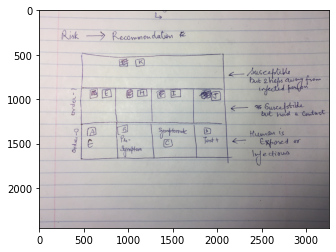

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("_RecBreakdown.png")
plt.imshow(image)
plt.show()

In [3]:
filename = "../src/covid19sim/logs4/tracker_data_n_200_seed_0_20200509-152434_.pkl"

In [4]:
data = dill.load(open(filename,"rb"))

In [5]:
risk_attributes = data['risk_attributes']
histograms_risk = defaultdict(list)
histograms_risk_level = defaultdict(list)
histograms_rec_level = defaultdict(list)
for x in risk_attributes:
    KEYS = []
    order_2 = True
    if x['exposed']:
        KEYS.append("A")
        order_2 = False
    
    if x['infectious'] and x['symptoms']==0:
        KEYS.append("B")
        order_2 = False
        
    if x['infectious'] and x['symptoms'] > 0:
        KEYS.append("C")
        order_2 = False
        
    if x['test']:
        KEYS.append("D")
        order_2 = False
        
    if x['order_1_is_exposed']:
        KEYS.append("E")
        order_2 = False
        
    if x['order_1_is_presymptomatic']:
        KEYS.append("H")
        order_2 = False
        
    if x['order_1_is_symptomatic']:
        KEYS.append("I")
        order_2 = False
        
    if x['order_1_is_tested']:
        KEYS.append("J")
        order_2 = False    
    
    if order_2:
        KEYS.append("K")

    for k in KEYS:    
        histograms_risk[k].append(x['risk'])
        histograms_risk_level[k].append(x['risk_level'])
        histograms_rec_level[k].append(x['rec_level'])

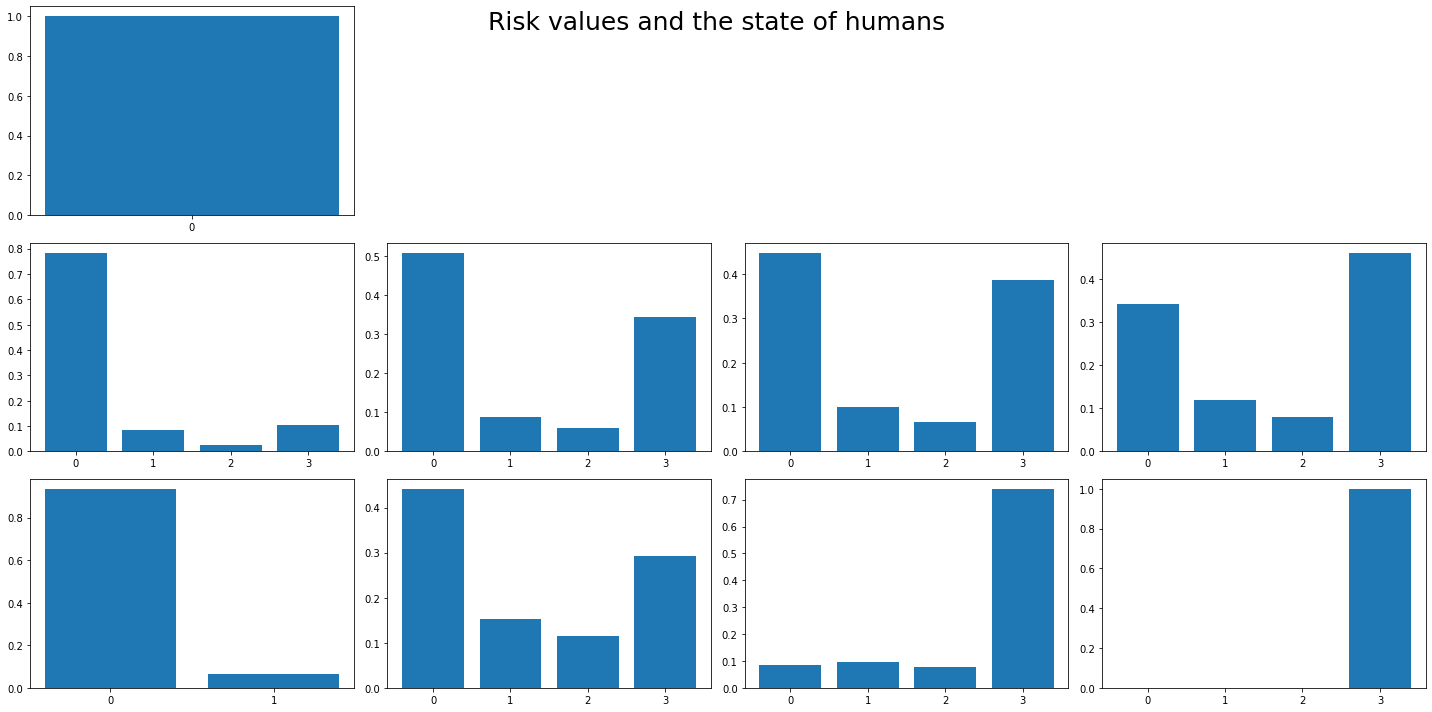

In [19]:
def _plot(axs, histogram, counts):
    if counts:
        frequency_count = {x:0 for x in range(min(histogram), max(histogram)+1)}
        for i in histogram:
            frequency_count[i] += 1
        x,y = zip(*frequency_count.items())
        y = np.array(y)
        y = y / sum(y)
        axs.bar(x,y)
        axs.set_xticks(x)
        axs.set_xticklabels(x)
        axs.tick_params(labelsize=10)
    else:
        axs.hist(histogram, density=True, bins=50, histtype="bar")
        axs.set_xlim(0,1)
    
        axs.tick_params(labelsize=25)

def plot_histograms(histogram, counts = False):
    fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20,10), sharex= not counts)

    _plot(axs[2][0], histogram["A"], counts)
    _plot(axs[2][1], histogram["B"], counts)
    _plot(axs[2][2], histogram["C"], counts)
    _plot(axs[2][3], histogram["D"], counts)

    _plot(axs[1][0], histogram["E"], counts)
    _plot(axs[1][1], histogram["H"], counts)
    _plot(axs[1][2], histogram["I"], counts)
    _plot(axs[1][3], histogram["J"], counts)

    _plot(axs[0][0], histogram["K"], counts)
    [x.set_visible(False) for x in axs[0][1:]]

    plt.tight_layout()

    fig.suptitle("Risk values and the state of humans", fontsize=25)
    
#     return fig 

plot_histograms(histograms_rec_level, counts=True)